In [1]:
%pip install pandas scikit-learn numpy matplotlib seaborn openpyxl
import pandas as pd
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Note: you may need to restart the kernel to use updated packages.


First few rows of Places Dataset:
                             name       lat        lng  \
0                Arugam Bay Beach  6.840408  81.836848   
1                   Mirissa Beach  5.944703  80.459161   
2  Weligama Beach (surf and stay)  5.972486  80.435714   
3                        Ahangama  5.973975  80.362159   
4                 Hikkaduwa Beach  6.137727  80.099060   

             formatted_address  rating  user_ratings_total  \
0  Arugam Bay Beach, Sri Lanka     4.8              1591.0   
1           Mirissa, Sri Lanka     4.6              1748.0   
2          Weligama, Sri Lanka     4.4               325.0   
3          Ahangama, Sri Lanka     NaN                 NaN   
4   Hikkaduwa Beach, Sri Lanka     4.7              1438.0   

                                      latest_reviews  
0  ['Arugam Bay Beach is a surfer's paradise! I s...  
1  ['Mirissa Beach is truly a gem on Sri Lankas s...  
2  ['Weligama Beach is a fantastic spot for both ...  
3  ['Ahangama was a bit 

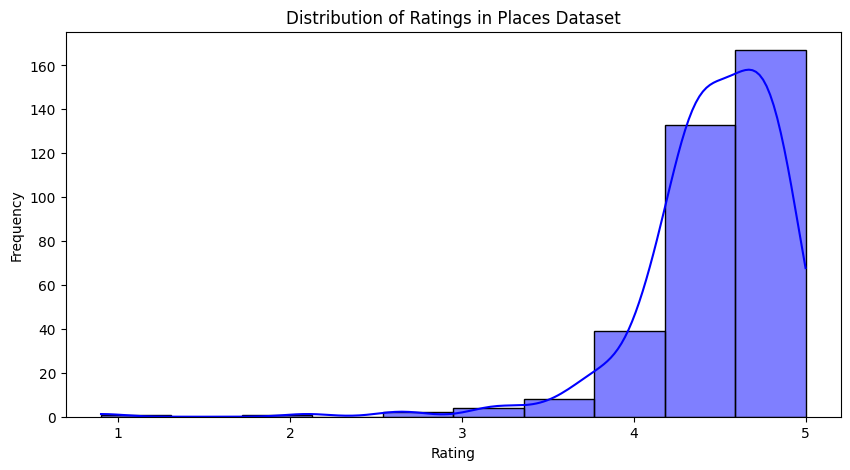

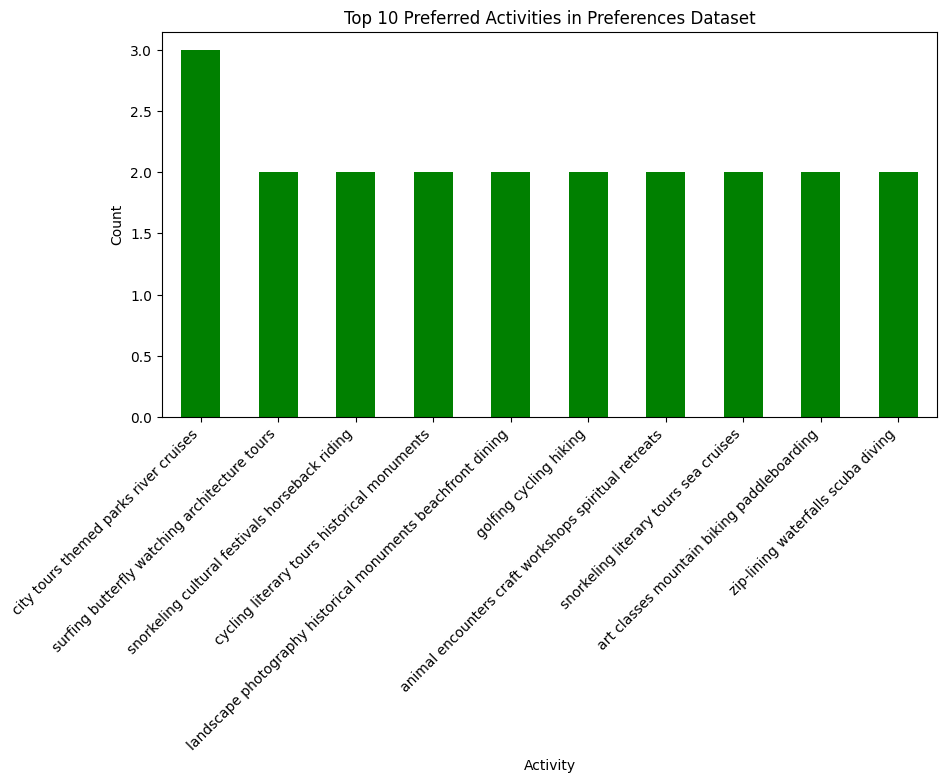

In [2]:
# Function to safely evaluate strings that are lists (for original data inspection)
def safely_evaluate(data):
    try:
        evaluated_data = literal_eval(data)
        if isinstance(evaluated_data, list) and all(isinstance(item, str) for item in evaluated_data):
            return ' '.join(evaluated_data)
        else:
            return ''
    except (ValueError, SyntaxError):
        return ''

# Load the datasets as excel files .This is for use in a kaggle enviorenment.
"""
places_df = pd.read_excel("/kaggle/input/travelsenseds/Places Dataset.xlsx")
preferences_df = pd.read_excel("/kaggle/input/travelsenseds/Visitors Preference Dataset.xlsx") """

#Load datasets in a local enviorenment.Please copy dataset file paths and paste here accordingly 
places_df = pd.read_excel("TravelsenseDatasets\Places Dataset.xlsx")
preferences_df = pd.read_excel("TravelsenseDatasets\Visitors Preference Dataset.xlsx")

# Displayed the first few rows of the places and preferences datasets to see if it was imported
print("First few rows of Places Dataset:")
print(places_df.head())

print("First few rows of Preferences Dataset:")
print(preferences_df.head())

# Visualization of original data to get an idea about what kind of output we can expect
# Visualizing the distribution of ratings in the places dataset
plt.figure(figsize=(10, 5))
sns.histplot(places_df['rating'].dropna(), bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings in Places Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualizing the count of preferred activities in the preferences dataset
plt.figure(figsize=(10, 5))
preferences_df['Preferred Activities'].apply(lambda x: safely_evaluate(x)).value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Preferred Activities in Preferences Dataset')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

                            name  similarity
15       Minneriya National Park    0.069337
41         National Museum Galle    0.068582
309            Trincomalee Beach    0.068091
1                  Mirissa Beach    0.064324
17   Horton Plains National Park    0.063123
6                Unawatuna Beach    0.059924
405        Bundala National Park    0.058230
19         Bundala National Park    0.057897
38       Colombo National Museum    0.057649
76                     Hikkaduwa    0.057264


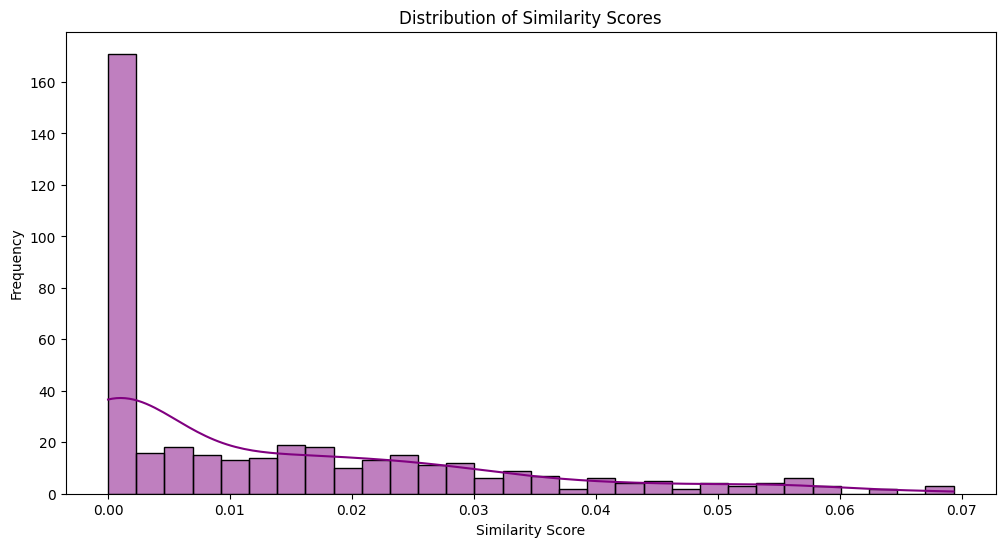

C:\Users\hp\AppData\Local\Temp\ipykernel_18696\1906911384.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommended_places.head(10), x='name', y='similarity', palette='viridis')


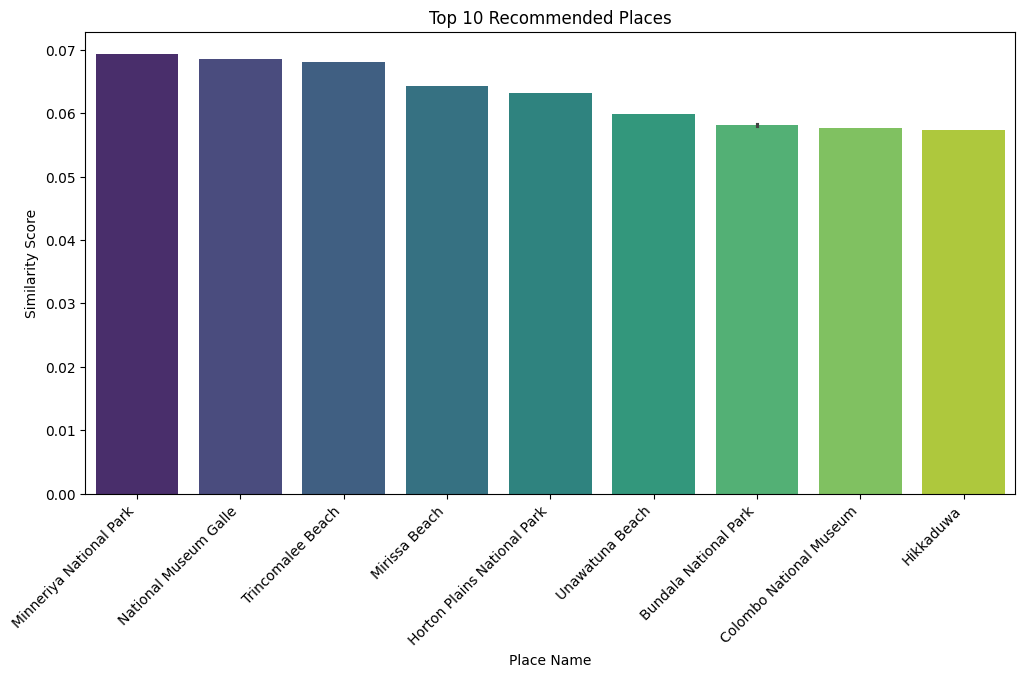

In [3]:
# Function to safely evaluate strings that are lists (for original data inspection)
def safely_evaluate(data):
    try:
        evaluated_data = literal_eval(data)
        if isinstance(evaluated_data, list) and all(isinstance(item, str) for item in evaluated_data):
            return ' '.join(evaluated_data)
        else:
            return ''
    except (ValueError, SyntaxError):
        return ''

# Application of TF-IDF vector

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Vectorize the original places data
tfidf_matrix = tfidf_vectorizer.fit_transform(places_df['latest_reviews'].apply(lambda x: safely_evaluate(x)))
# Vectorize user preferences
user_preferences_vector = tfidf_vectorizer.transform(preferences_df['Preferred Activities'].apply(lambda x: safely_evaluate(x)) + ' ' + preferences_df['Bucket list destinations Sri Lanka'].apply(lambda x: safely_evaluate(x)))
# Compute similarity scores between user preferences and places
similarity_scores = cosine_similarity(user_preferences_vector, tfidf_matrix)
# If similarity scores are calculated, add them to the DataFrame (average of all user preferences)
if not similarity_scores.size == 0:
    places_df['similarity'] = similarity_scores.mean(axis=0)
    # Sort the places DataFrame by similarity score to get recommendations
    recommended_places = places_df.sort_values(by='similarity', ascending=False)
    
    # Display the top 10 recommended places
    print(recommended_places[['name', 'similarity']].head(10))
    
    # Visualization of similarity scores
    plt.figure(figsize=(12, 6))
    sns.histplot(places_df['similarity'].dropna(), bins=30, kde=True, color='purple')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.show()
    
    # Visualization of top 10 recommended places
    plt.figure(figsize=(12, 6))
    sns.barplot(data=recommended_places.head(10), x='name', y='similarity', palette='viridis')
    plt.title('Top 10 Recommended Places')
    plt.xlabel('Place Name')
    plt.ylabel('Similarity Score')
    plt.xticks(rotation=45, ha='right')
    plt.show()

else:
    print("No similarity scores were computed.")


Top Recommendations for Amber Hansen


,name,formatted_address,rating,latest_reviews
106,Velgam Vehera Buddhist Temple,"Vilgam Vihara Rd, Sri Lanka",4.8,['Visiting Velgam Vehera was a profound experi...
345,Deliwala Kota Vehera Temple,"Rambukkana , Sri Lanka",4.8,['Deliwala Kota Vehera Temple is a hidden gem!...
399,Ambuluwawa Biodiversity Complex,"Gampola, Sri Lanka",4.7,['The Ambuluwawa Biodiversity Complex is a hid...
16,Minneriya National Park,Sri Lanka,4.6,['Minneriya National Park is a must-visit for ...
406,Bundala National Park,"Weligatta, Sri Lanka",4.3,['Bundala National Park is a hidden gem! I arr...
199,Yala Green Safari,"Debarawewa, Sri Lanka",4.3,['Yala Green Safari was an incredible experien...
20,Bundala National Park,"bundala , Sri Lanka",4.3,['Bundala National Park is a hidden gem for na...
178,Colombo Lotus Tower,"Colombo, Sri Lanka",4.1,['The Colombo Lotus Tower is a spectacular sig...
342,Neithal Park,"Chavakachcheri, Sri Lanka",2.1,['Neithal Park was a bit disappointing. The fa...
206,Heyna camping site,"Weligatta, Sri Lanka",NaN,['The Heyna camping site was a bit of a letdow...


C:\Users\hp\AppData\Local\Temp\ipykernel_18696\3114127930.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=recommendations_sorted, palette='viridis')


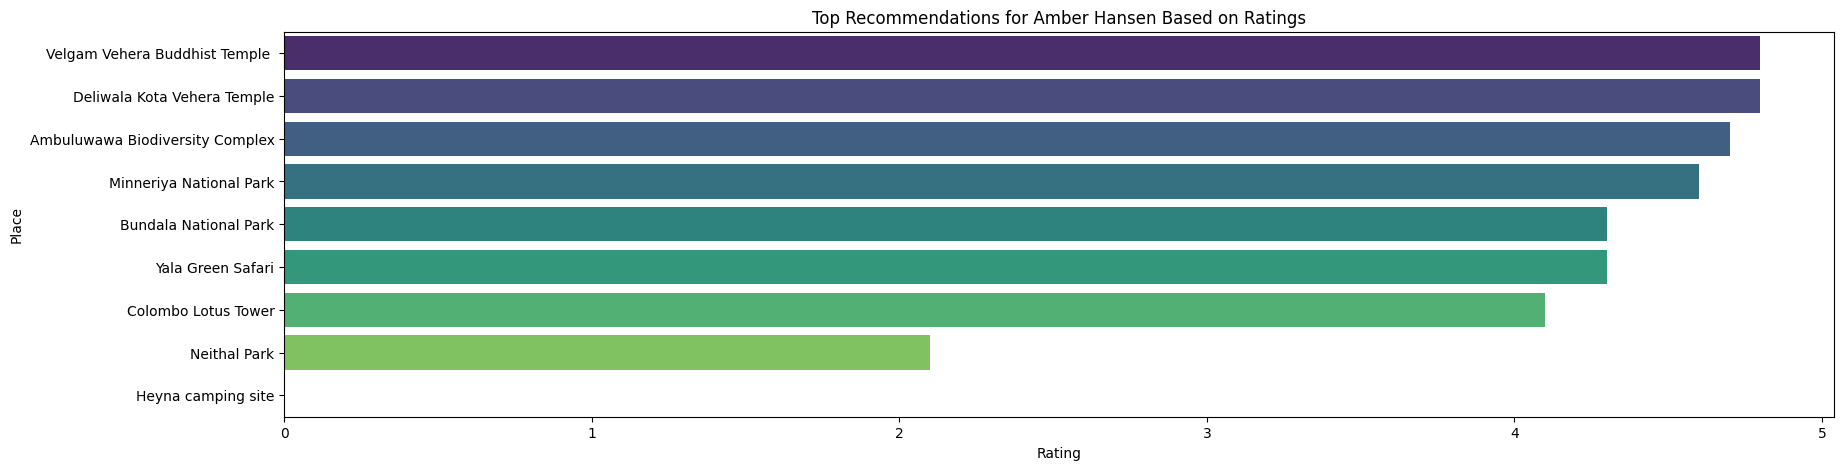

In [4]:
# Function to get recommendations for a user by user ID to get
def get_recommendations(user_id, top_n=10):#<--------------------------------------------- Specify how many recommendations are needed by top_n
    # Check if the user exists in the dataset(max id is 1000)
    if user_id not in preferences_df['User ID'].values:
        return f"User ID {user_id} not found."
    
    # Get the index of the user
    user_index = preferences_df[preferences_df['User ID'] == user_id].index[0]
    
    # Get the user's name
    user_name = preferences_df.loc[preferences_df['User ID'] == user_id, 'Name'].values[0]

    # Get the similarity scores for that user
    user_scores = similarity_scores[user_index]
    
    # Sort places by similarity score for this user
    recommended_indices = user_scores.argsort()[-top_n:][::-1]
    
    # Get the top n recommended places
    recommended_places = places_df.iloc[recommended_indices].copy()
    
    # Add a column for the user's name in the recommendations
    recommended_places['User Name'] = user_name
    
    # Reset index for readability (1-based index)
    recommended_places.index = recommended_places.index + 1
    
    # Sort recommendations by rating in descending order
    recommendations_sorted = recommended_places.sort_values(by='rating', ascending=False)
    
    return user_name, recommendations_sorted[['name', 'formatted_address', 'rating', 'latest_reviews']]

# Function to plot the recommendations as a bar chart
def plot_recommendations(recommendations_sorted, user_name):
    plt.figure(figsize=(20, 5))
    sns.barplot(x='rating', y='name', data=recommendations_sorted, palette='viridis')
    plt.title(f"Top Recommendations for {user_name} Based on Ratings")
    plt.xlabel('Rating')
    plt.ylabel('Place')
    plt.show()

# Example: Get top recommendations for a user and plot them
user_id = 80  # Example user ID, adjust based on your data <-----------------------CHANGE THE ID HERE TO TEST THE MODEL and SEE. MAX is 1000
user_name, recommendations_sorted = get_recommendations(user_id)

print(f"Top Recommendations for {user_name}")

# Display the recommendations in a table
display(recommendations_sorted)

# Plot the recommendations for the user
plot_recommendations(recommendations_sorted.head(10), user_name)  #<---------------change the number within head(#) to change the number of datapoints in graph


In [5]:
#SAVING the model

# Created a dictionary to store all components together to avoide it being messy
model_components = {
    'tfidf_vectorizer': tfidf_vectorizer,
    'similarity_scores': similarity_scores,
    'places_df': places_df,
    'preferences_df': preferences_df
}

# And saved all components into a single .pkl file
with open('combined_model.pkl', 'wb') as f:
    pickle.dump(model_components, f)

print("Model components saved successfully in 'combined_model.pkl'.")


Model components saved successfully in 'combined_model.pkl'.


In [6]:
#LOADING the model


with open('combined_model.pkl', 'rb') as f:
    model_components = pickle.load(f)

#Or can access individual components 
tfidf_vectorizer = model_components['tfidf_vectorizer']
similarity_scores = model_components['similarity_scores']
places_df = model_components['places_df']
preferences_df = model_components['preferences_df']

print("Model components loaded successfully from 'combined_model.pkl'.")


Model components loaded successfully from 'combined_model.pkl'.
